# Image Data PreProcessing

# # Importing necessary Libreries

In [40]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")



# Data Augumentation



In [41]:
# Data Generator

train_data_generator = ImageDataGenerator(rescale=1./255,
                                          rotation_range=90,
                                          width_shift_range=0.4,
                                          fill_mode='reflect',
                                          vertical_flip=True,
                                          channel_shift_range=150.0,
                                          zoom_range=[0.5, 1.5],
                                          shear_range=45.0,
                                          brightness_range=(0.2, 0.8))

test_data_generator = ImageDataGenerator(rescale=1./255)

# Applying ImageDataGenerator Functionality To Trainset 

In [42]:
train_data = train_data_generator.flow_from_directory(r"./Dataset/Dataset/train_set",
                                                      target_size=(64,64),
                                                      batch_size=50,
                                                      class_mode='binary',
                                                      shuffle=True,
                                                      color_mode='rgb')
#Applying ImageDataGenerator Functionality To  Testset

test_data = test_data_generator.flow_from_directory(r"./Dataset/Dataset/test_set",
                                                      target_size=(64,64),
                                                      batch_size=50,
                                                      class_mode='binary',
                                                      shuffle=True,
                                                      color_mode='rgb')                                                  

Found 436 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


# Model Building

In [43]:
# Initializing the Model
model = Sequential()
# Adding CNN Layers
#convolution and Pooling layer 1
model.add(Conv2D(filters=48,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.4))

#convolution and Pooling layer 2
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Dropout(0.4))

#Flattening the images
model.add(Flatten())

# Add Dense Layer
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 48)        1344      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 48)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 48)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        13856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)       

In [45]:
# Adding call to Avoid Overfitting

early_stop = EarlyStopping(monitor="val_accuracy",
                           min_delta=0.003,
                           patience=6, 
                           verbose=1, 
                           mode='auto',
                           restore_best_weights=True)

lr = ReduceLROnPlateau(monitor="val_accuracy",
                      factor=0.2,
                      patience=3,
                      verbose=1,
                      mode="auto",
                      min_delta=0.003,
                      cooldown=1)

callback = [early_stop,lr]

In [46]:
# Configuring the Learning Process
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [47]:
# Training The Model
result = model.fit(train_data,
                  epochs=30,
                  callbacks=callback,
                  validation_data=test_data)


Epoch 1/30
9/9 [==============================] - 70s 7s/step - loss: 0.6953 - accuracy: 0.6078 - val_loss: 0.5835 - val_accuracy: 0.5917 - lr: 0.0010
Epoch 2/30
9/9 [==============================] - 50s 6s/step - loss: 0.5708 - accuracy: 0.6835 - val_loss: 0.4588 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 3/30
9/9 [==============================] - 56s 6s/step - loss: 0.4479 - accuracy: 0.7936 - val_loss: 0.2129 - val_accuracy: 0.9083 - lr: 0.0010
Epoch 4/30
9/9 [==============================] - 56s 7s/step - loss: 0.3792 - accuracy: 0.8303 - val_loss: 0.1488 - val_accuracy: 0.9417 - lr: 0.0010
Epoch 5/30
9/9 [==============================] - 31s 3s/step - loss: 0.3807 - accuracy: 0.8372 - val_loss: 0.2372 - val_accuracy: 0.8667 - lr: 0.0010
Epoch 6/30
9/9 [==============================] - 44s 5s/step - loss: 0.3670 - accuracy: 0.8349 - val_loss: 0.1378 - val_accuracy: 0.9667 - lr: 0.0010
Epoch 7/30
9/9 [==============================] - 57s 7s/step - loss: 0.3168 - accuracy: 0.880

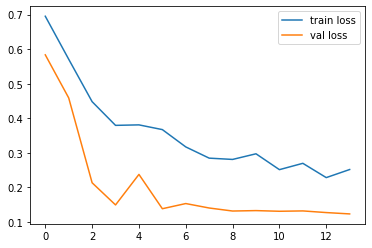

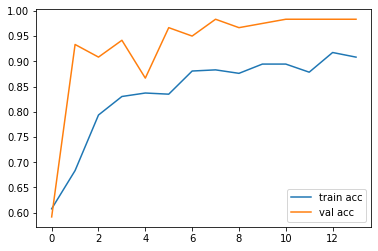

In [48]:
#plot the loss
plt.plot(result.history['loss'], label='train loss')
plt.plot(result.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(result.history['accuracy'], label='train acc')
plt.plot(result.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [49]:
np.save('my_history.npy',result.history)

In [50]:
#Save the Model
model.save('Forest_Fire.h5')

In [51]:
#Test Model
saved_model = load_model('forest_Fire.h5')

In [52]:
#Predict The Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2


In [53]:
model = load_model("forest_fire.h5")


img=image.load_img(r'Dataset\Dataset\test_set\forest\0.48007200_1530881924_final_forest.jpg')
x=image.img_to_array(img)
res = cv2.resize(x, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)
x = np.expand_dims(res, axis=0)

In [54]:
pred = model.predict(x)
pred = int(pred[0][0])
pred

0

In [55]:
img=image.load_img(r'Dataset\Dataset\test_set\with fire\19464620_401.jpg')
x=image.img_to_array(img)
res = cv2.resize(x, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)
x = np.expand_dims(res, axis=0)

In [56]:
pred = model.predict(x)
pred = int(pred[0][0])
pred

1

Testing the Model

In [57]:
#Testing the model
from keras.models import load_model
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

from tensorflow.keras.utils import img_to_array
model = load_model('Forest_Fire.h5')
def prediction(img_path):
    i = cv2.imread(img_path)
    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    img = Image.open(img_path)
    img = img.resize((64,64))
    x = img_to_array(img)
    x = np.expand_dims(x,axis=0)
    pred = model.predict(x)
    plt.imshow(i)
    print("%s"%("FOREST FIRE DETECTED! SMS SENT!" if pred==[[1.]] else "NO FOREST FIRE DETECTED"))

FOREST FIRE DETECTED! SMS SENT!


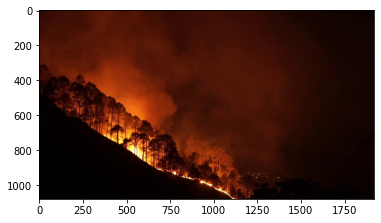

In [58]:
prediction(r'Dataset\Dataset\test_set\forest\0.64133000_1519374442_forest_deep.jpg')

FOREST FIRE DETECTED! SMS SENT!


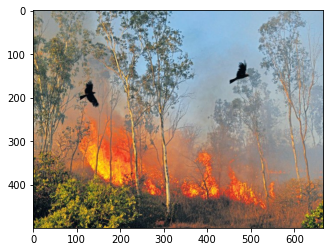

In [59]:
prediction(r'Dataset/Dataset/test_set/with fire/599857.jpg')

In [60]:
import cv2 
import numpy as np

from matplotlib import pyplot as plt

from tensorflow.keras.preprocessing import image
from keras.models import load_model
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('fire.mp4')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    
    cv2.imshow("Fire Detection",frame)
    x=image.img_to_array(frame)
    res=cv2.resize(x,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("Forest_Fire.h5")
    pred=model.predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==0:
      print('Forest fire')
      break
    else:
      print("no danger")
      break
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

Forest fire


In [61]:

from twilio.rest import Client
from playsound import playsound
if pred==0:
  print('Forest fire')
  from twilio.rest import Client
  account_sid='ACf68255cbe82460c9266beb672d744602'
  auth_token='c7e7819f9ee7412b408abe7b09083cae'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+18176705182',
      #to number
      to='+916381614097')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
  playsound(r'Alaram.mp3')
elif pred==1:
  print('No Fire')

Forest fire
SM37797e96d59a21a739a7a39173b4a1f9
Fire detected
SMS Sent!
